### Marketing to Frequent Fliers.  
The file EastWestAirlinesCluster.xls (available on the textbook website Data Mining for Business Analytics; the dataset is available with the 3rd edition of the book) contains information on 4,000 passengers who belong to an airline’s frequent flier program. For each passenger, the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

b. Apply hierarchical clustering with Euclidean distance and Ward’s method. How many clusters do
appear?


In [483]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [484]:
data = pd.read_csv('EastWestAirlinesCluster-updated.csv')

In [485]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [486]:
data.shape

(3999, 12)

### Data Preprocessing

In [487]:
#Conducting Basic EDA

In [488]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#Going through the Data Description:

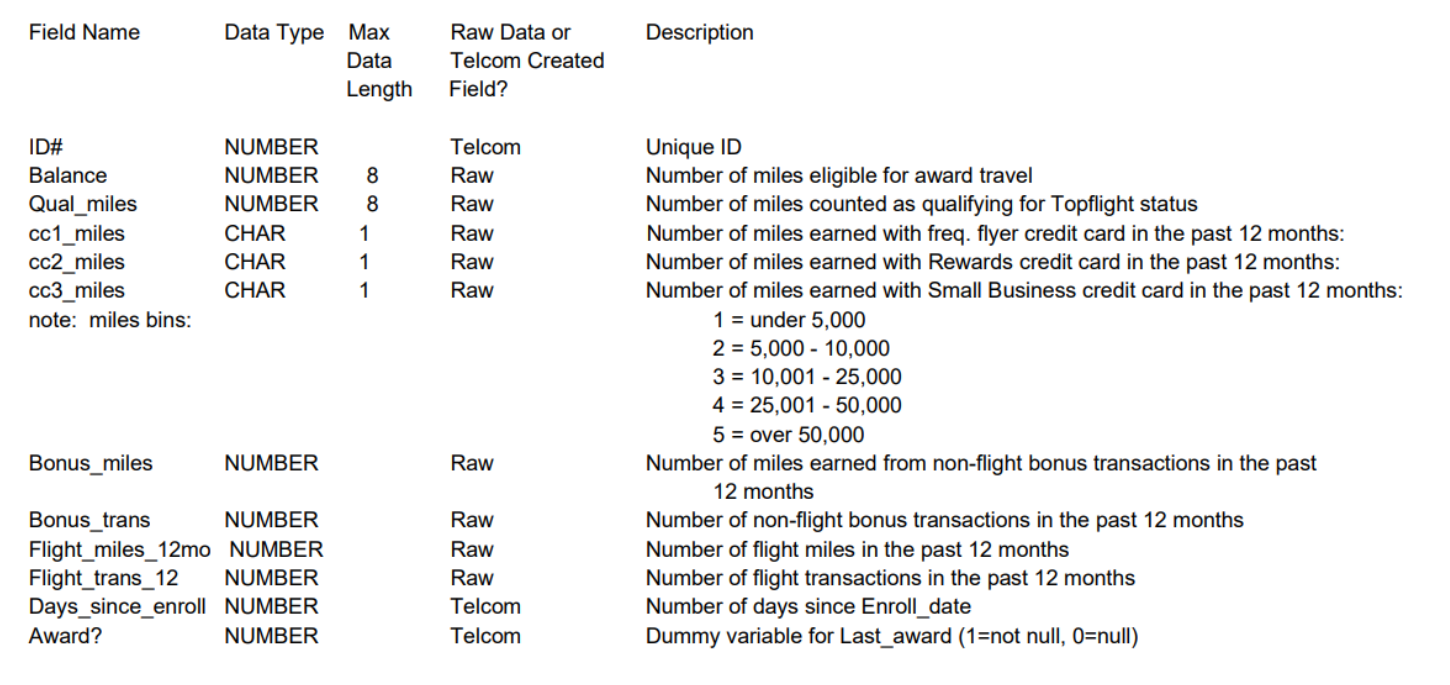

We can see that cc1_miles, cc2_miles, cc2_miles are non-numeric CHAR Variables.  
Award is a Dummy variable.  
Rest are Numeric Variables.  

In [489]:
#Leaving out the ID Column:

In [490]:
data= data.drop('ID#', axis=1)

In [491]:
#Describing the Numerical Columns:

In [492]:
data_num= data[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll']]

In [493]:
data_num

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,1403
3995,64385,0,981,5,0,0,1395
3996,73597,0,25447,8,0,0,1402
3997,54899,0,500,1,500,1,1401


In [494]:
data_num.describe()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


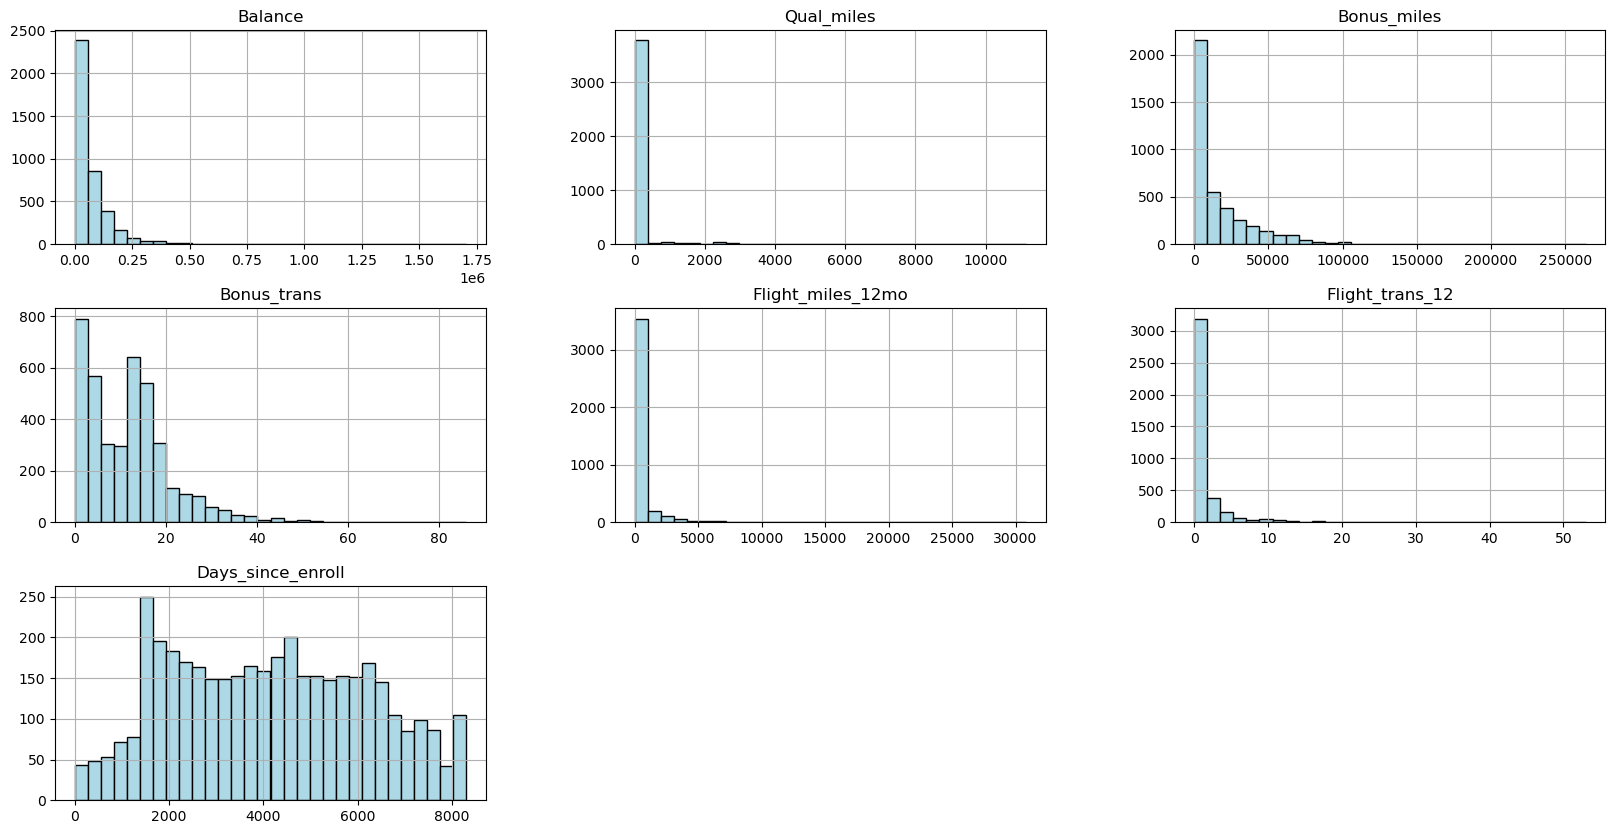

In [495]:
data_num.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

Since there are wide variations in scales of different features, we normalize the numerical columns.


In [496]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
print("Normalized Data = ", data_scaled)

Normalized Data =  [[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  3.40437193e-01 0.00000000e+00]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  1.80009571e-02 1.28394844e-05]
 [9.99591676e-01 0.00000000e+00 1.82078303e-05 ... 1.82078303e-05
  2.55091703e-02 0.00000000e+00]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  4.20545513e-01 0.00000000e+00]]


**Putting Normalized data in a dataframe**

In [497]:
normalized_data = pd.DataFrame(data_scaled,columns= data.columns)

In [498]:
normalized_data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


In [499]:
normalized_data.shape

(3999, 11)

In [500]:
#Plotting Dendrogram

In [501]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage

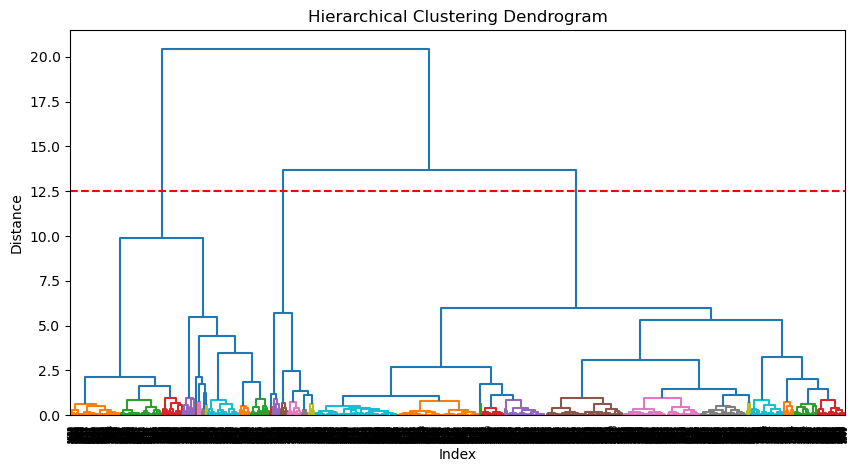

In [357]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(normalized_data, method='ward'),  color_threshold=1)
plt.axhline(y=12.5, color='r', linestyle='--')

#### Hence we can see 3 clusters emerge for the analysis.

**Applying hierarchical clustering with Euclidean distance and Ward’s method**

In [502]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean', linkage= 'ward').fit(normalized_data)
h_complete.fit_predict(normalized_data)


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [558]:
data = pd.read_csv('EastWestAirlinesCluster-updated.csv')

In [559]:
cluster_labels=pd.Series(h_complete.labels_)
data['Cluster']=cluster_labels # creating a  new column and assigning it to new column 
print(data)

       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

c. Compare cluster centroids to characterize different clusters and try to give each cluster a label—a
meaningful name that characterizes the cluster.

In [506]:
print('Count in each cluster: \n', data['Cluster'].value_counts())

Count in each cluster: 
 1    2738
0    1032
2     229
Name: Cluster, dtype: int64


In [507]:
passenger_1 = data[(data ['Cluster'] == 0)]
passenger_2 = data[(data ['Cluster'] == 1)]
passenger_3 = data[(data ['Cluster'] == 2)]
passenger_1_centroid = passenger_1.mean(axis=0)
passenger_2_centroid = passenger_2.mean(axis=0)
passenger_3_centroid = passenger_3.mean(axis=0)


In [508]:
df1 = pd.DataFrame(passenger_1_centroid, columns=['Cluster 1'])
df2 = pd.DataFrame(passenger_2_centroid, columns=['Cluster 2'])
df3 = pd.DataFrame(passenger_3_centroid, columns=['Cluster 3'])
hca_centroid = pd.concat([df1,df2, df3], axis=1)

In [509]:
hca_centroid  #Cluster centroids of HCA

,Cluster 1,Cluster 2,Cluster 3
Balance,52668.701550,87185.011687,5524.222707
Qual_miles,103.471899,170.754565,8.755459
cc1_miles,3.271318,1.691381,1.000000
cc2_miles,1.030039,1.009861,1.000000
cc3_miles,1.043605,1.001461,1.000000
Bonus_miles,37729.176357,10771.319211,584.532751
Bonus_trans,17.566860,10.123083,2.401747
Flight_miles_12mo,503.352713,476.612126,66.982533
Flight_trans_12,1.510659,1.419284,0.209607
Days_since_enroll,4141.220930,4046.725712,4875.301310


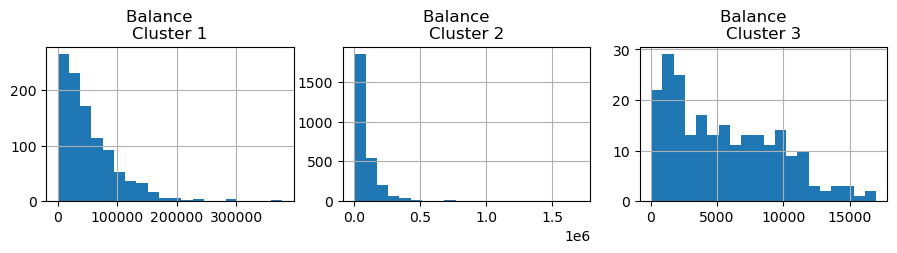

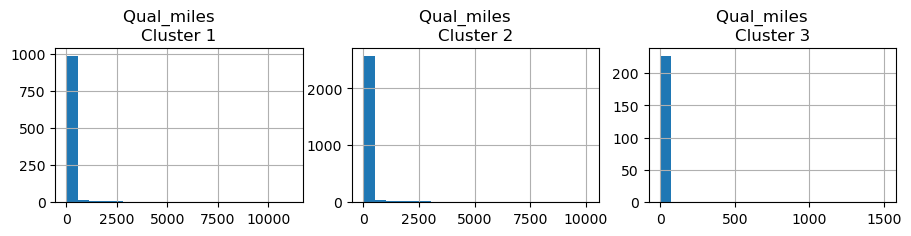

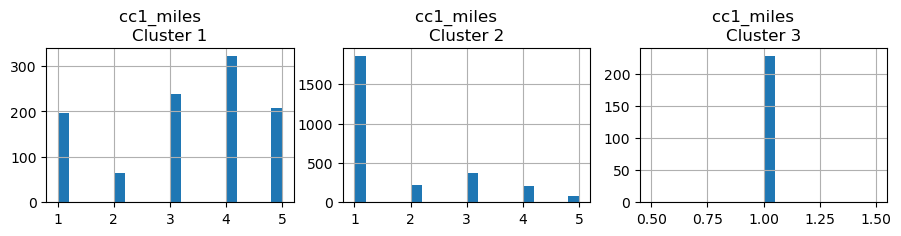

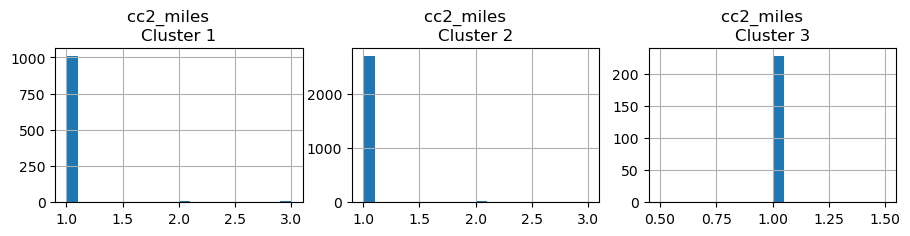

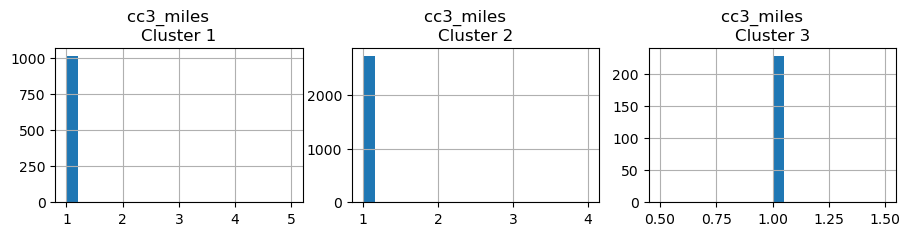

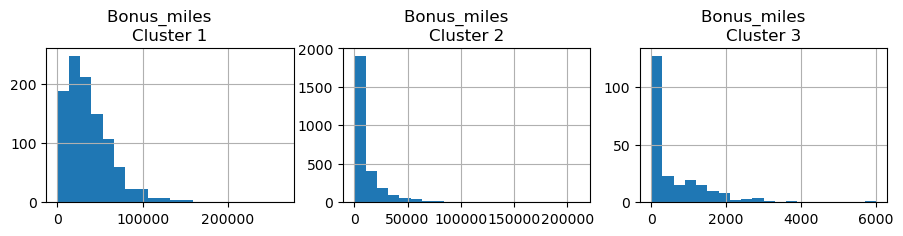

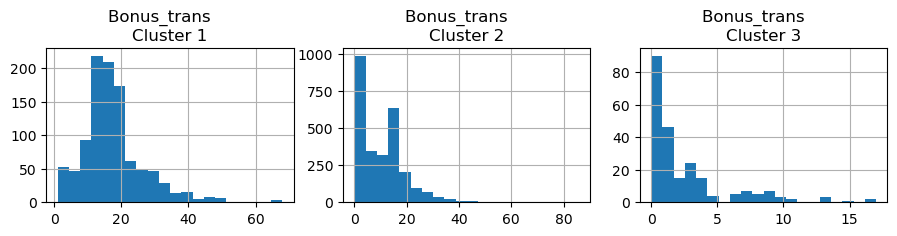

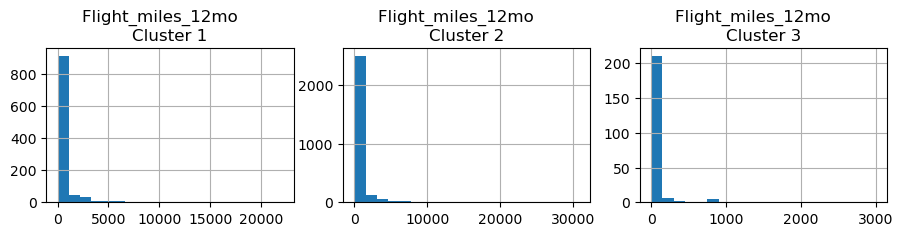

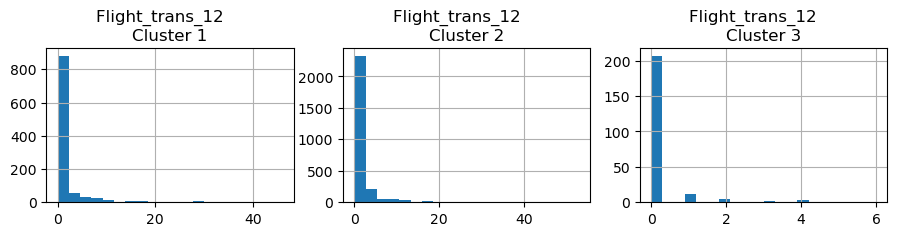

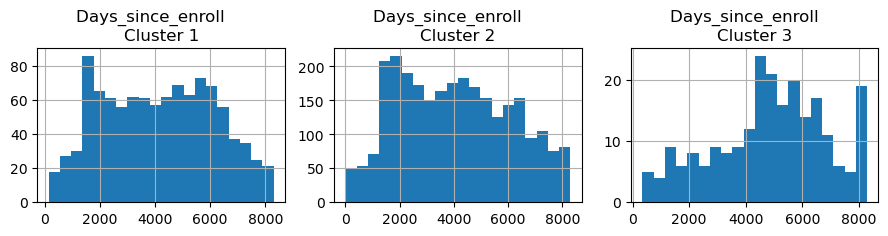

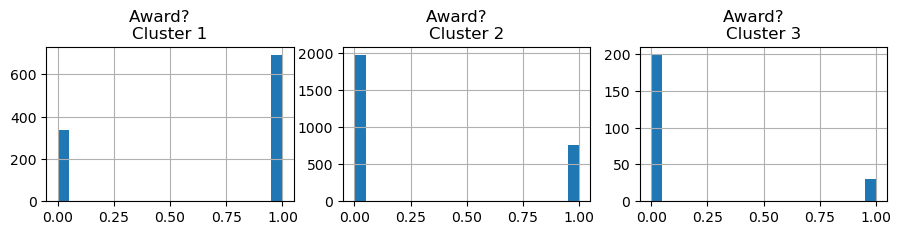

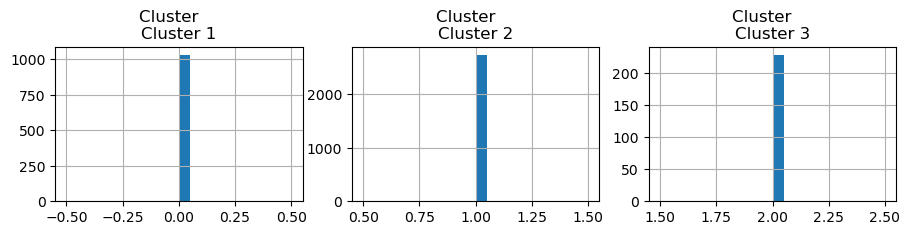

In [510]:
#Lets plot the histograms of all clusters with respect to all variables
for i in data.columns:
    plt.figure(figsize=(30,2))
    for j in range(3):
        plt.subplot(1,8,j+1)
        cluster=data[data['Cluster']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {}'.format(i,j+1))
        
plt.show()

### Meaningful Cluster Labels:

1. Cluster1 = "High Frequency Fliers"= There are 1032 such passengers, with the highest cc1_miles (Number of miles earned with freq. flyer credit card in the past 12 months). These customers travel frequently and have the maximum flight miles in the past 12 months and highest number of flight transactions in the past 12 months. They also have the highest number of non-flight bonus transactions in the past 12 months. They have the highest award, which indicates that they have earned the most out of the card.
2. Cluster2 = "Regular Fliers" = There are 2738 such passengers. They are the regular passengers who spend and travel average to the other clusters. Their frequency of travel is also not proportional to the non-flight bonus transactions (in the past 12 months) or Award. They have the highest Balance and least Award, which indicates that they are not making use of the card satisfactorily.
3. Cluster3 = "Loyal Fliers" = There are 229 such passengers. They have the highest Number of days since Enroll_date but are not so frequent fliers. However, in proportion to their travel frequency, they do have a good usage of the card for Bonus transactions (Number of non-flight bonus transactions in the past 12 months) and Awards.



d. To check the stability of clusters, remove a random 5% of the data (by taking a random sample of 95% of the records), and repeat the analysis. Does the same picture emerge?

In [511]:
#Reading the original dataset again

In [512]:
data1 = pd.read_csv('EastWestAirlinesCluster-updated.csv')

In [513]:
data1= data1.drop('ID#', axis=1)

In [514]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [515]:
remove_n = 200   #5% of values

drop_indices = np.random.choice(data1.index, remove_n, replace=False)
df_subset = data1.drop(drop_indices)

In [516]:
df_subset

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [517]:
#We can see 5% of data dopped randomly

In [518]:
from sklearn.preprocessing import normalize
normalized1 = normalize(df_subset)
print("Normalized Data = ", normalized1)

Normalized Data =  [[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  3.40437193e-01 0.00000000e+00]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  1.80009571e-02 1.28394844e-05]
 [9.99591676e-01 0.00000000e+00 1.82078303e-05 ... 1.82078303e-05
  2.55091703e-02 0.00000000e+00]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  4.20545513e-01 0.00000000e+00]]


In [519]:
normalized_data1 = pd.DataFrame(normalized1,columns= df_subset.columns)


In [520]:
normalized_data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


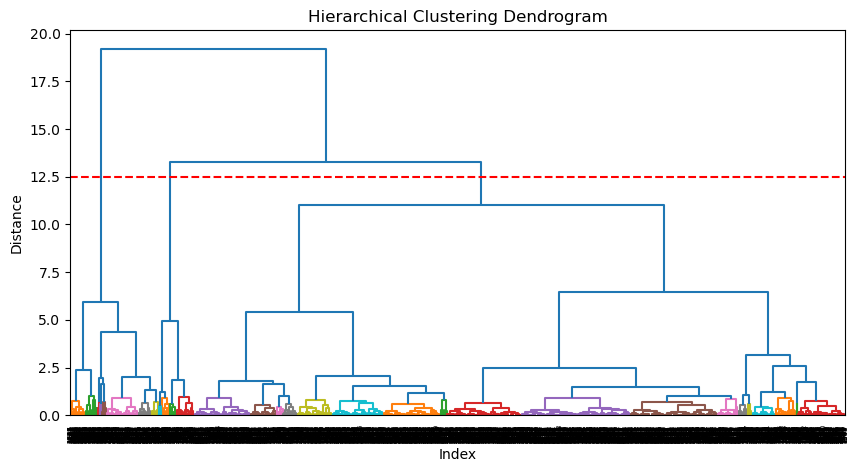

In [383]:
plt.figure(figsize=(10, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dend=sch.dendrogram(sch.linkage(normalized_data1, method='ward'),  color_threshold=1)
plt.axhline(y=12.5, color='r', linestyle='--')

#### Hence we can see 3 clusters emerge for the analysis.

In [521]:
from sklearn.cluster import AgglomerativeClustering 
h_complete1 = AgglomerativeClustering(n_clusters=3,affinity= 'euclidean', linkage= 'ward').fit(normalized_data)
h_complete1.fit_predict(normalized_data1)


array([2, 2, 0, ..., 0, 0, 2], dtype=int64)

In [563]:
cluster_labels1=pd.Series(h_complete1.labels_)
df_subset['Cluster_95']=cluster_labels1 # creating a  new column and assigning it to new column 
print(df_subset)

      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0               1      

**Count of the cluster values**

In [524]:
print('Count in each cluster: \n', data1['Cluster_95'].value_counts())

Count in each cluster: 
 0.0    2932
2.0     482
1.0     385
Name: Cluster_95, dtype: int64


In [525]:
#Calculating Centroids

In [526]:
passenger_1 = data1[(data1 ['Cluster_95'] == 0)]
passenger_2 = data1[(data1 ['Cluster_95'] == 1)]
passenger_3 = data1[(data1 ['Cluster_95'] == 2)]
passenger_1_centroid = passenger_1.mean(axis=0)
passenger_2_centroid = passenger_2.mean(axis=0)
passenger_3_centroid = passenger_3.mean(axis=0)


In [527]:
df1_95 = pd.DataFrame(passenger_1_centroid, columns=['Cluster 1'])
df2_95 = pd.DataFrame(passenger_2_centroid, columns=['Cluster 2'])
df3_95 = pd.DataFrame(passenger_3_centroid, columns=['Cluster 3'])
hca_centroid_95 = pd.concat([df1_95,df2_95, df3_95], axis=1)

In [528]:
hca_centroid_95

,Cluster 1,Cluster 2,Cluster 3
Balance,74234.450205,73838.072727,83105.875519
Qual_miles,149.168486,112.446753,165.624481
cc1_miles,2.090723,2.098701,2.022822
cc2_miles,1.015689,1.015584,1.006224
cc3_miles,1.013984,1.015584,1.004149
Bonus_miles,17640.844475,17052.716883,16804.419087
Bonus_trans,11.736698,11.257143,11.838174
Flight_miles_12mo,442.150409,355.368831,677.993776
Flight_trans_12,1.360846,1.057143,1.825726
Days_since_enroll,4148.049113,4294.703896,4856.045643


By removing a random 5% of the data, we can see that the Dendrogram and Cluster centroids have significantly different characteristics. This can be seen especially in Cluster 3, of erstwhile "Loyal Fliers" who have the highest Number of days since Enroll_date but are also the 2nd highest frequent fliers. So clearly, the same picture does not emerge.

e. Cluster all passengers again using k-means clustering. How many clusters do you want to go with?
How did you decide on the number of clusters? Explain your choice on the number of clusters.

In [529]:
#Reading the dataset again

In [530]:
data2 = pd.read_csv('EastWestAirlinesCluster-updated.csv')

In [531]:
data2= data2.drop('ID#', axis=1)

In [532]:
#Normalising the data before applying KMeans

In [533]:
from sklearn.preprocessing import normalize
normalized_data = normalize(data2)
print("Normalized Data = ", normalized_data)

Normalized Data =  [[9.70414393e-01 0.00000000e+00 3.44815547e-05 ... 0.00000000e+00
  2.41370883e-01 0.00000000e+00]
 [9.40208573e-01 0.00000000e+00 4.88572320e-05 ... 0.00000000e+00
  3.40437193e-01 0.00000000e+00]
 [9.81113099e-01 0.00000000e+00 2.37247449e-05 ... 0.00000000e+00
  1.66879855e-01 0.00000000e+00]
 ...
 [9.44947533e-01 0.00000000e+00 3.85184532e-05 ... 0.00000000e+00
  1.80009571e-02 1.28394844e-05]
 [9.99591676e-01 0.00000000e+00 1.82078303e-05 ... 1.82078303e-05
  2.55091703e-02 0.00000000e+00]
 [9.07271293e-01 0.00000000e+00 3.00819394e-04 ... 0.00000000e+00
  4.20545513e-01 0.00000000e+00]]


In [534]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

**Plotting the elbow curve by noting the WCSS distortions**

In [535]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++')
    kmeanModel.fit(normalized_data)
    distortions.append(kmeanModel.inertia_)

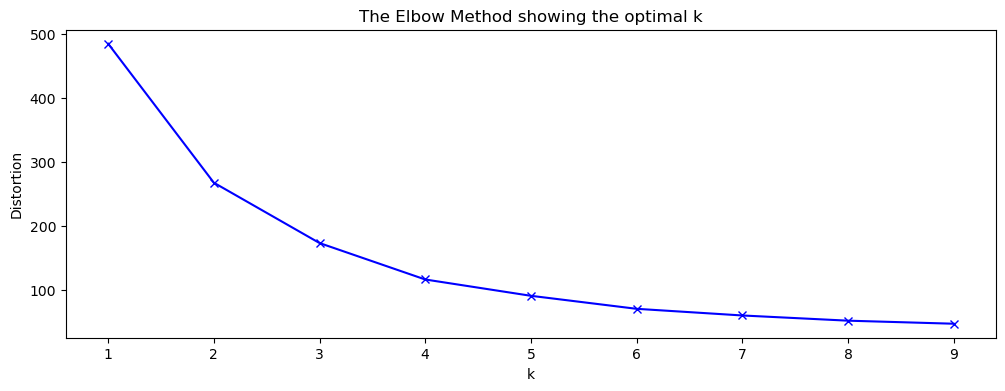

In [536]:
plt.figure(figsize=(12,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [537]:
#WCSS ( Within-Cluster Sum of Square ) distortions: the sum of squared distance between each point and the centroid in a cluster

distortions

[484.85112913072527,
 267.5974109599186,
 173.27025625511416,
 116.32481600680403,
 90.82410661194868,
 70.47296409901435,
 60.077579201841274,
 51.934931000531925,
 47.17230616681256]

When we analyze the graph we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph starts to move almost parallel to the X-axis. So the ideal k would be 3.

**Taking number of clusters=3**

In [538]:
kmeansModel = KMeans(n_clusters=3)
kmeansModel.fit(normalized_data)
kmeansPredict= kmeansModel.predict(normalized_data)

**Getting the cluster labels**

In [565]:
data2 = pd.read_csv('EastWestAirlinesCluster-updated.csv')

In [566]:
kmeansModel.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(kmeansModel.labels_)  # converting numpy array into pandas series object 
data2['KMeans_clusters']=md # creating a  new column and assigning it to new column 
data2.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


f. How do the characteristics of the clusters, obtained in Part (e), contrast or validate the finding in Part c above?

In [541]:
print(kmeansModel.cluster_centers_)

[[9.72915814e-01 3.32753701e-03 4.32515674e-05 3.56632121e-05
  3.54159133e-05 1.33941084e-01 2.11254052e-04 6.76322602e-03
  2.11717605e-05 9.85574060e-02 5.46966912e-06]
 [6.30508213e-01 9.15231468e-04 2.08191153e-04 2.07409255e-04
  2.07409255e-04 1.22266715e-01 4.68663039e-04 6.69160773e-03
  2.24693038e-05 6.85884357e-01 2.55697749e-05]
 [7.02585534e-01 2.28699642e-03 7.65752681e-05 3.73696106e-05
  3.65177677e-05 6.40527156e-01 4.48000121e-04 1.23850237e-02
  4.00021547e-05 1.06746997e-01 2.03293904e-05]]


In [542]:
kmeansModel.cluster_centers_.shape

(3, 11)

In [543]:
#Lets make the data frame of this cluster centre to understand and give the column names
cluster_centers=pd.DataFrame(data=kmeansModel.cluster_centers_,columns=[data2.columns[:11]])
cluster_centers

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.972916,0.003328,0.000043,0.000036,0.000035,0.133941,0.000211,0.006763,0.000021,0.098557,0.000005
1,0.630508,0.000915,0.000208,0.000207,0.000207,0.122267,0.000469,0.006692,0.000022,0.685884,0.000026
2,0.702586,0.002287,0.000077,0.000037,0.000037,0.640527,0.000448,0.012385,0.000040,0.106747,0.000020


In [544]:
# To interpret the above numbers, let us view the classes in the original dataset

In [545]:
data2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [546]:
passenger_1 = data2[(data2['KMeans_clusters'] == 0)]
passenger_2 = data2[(data2['KMeans_clusters'] == 1)]
passenger_3 = data2[(data2['KMeans_clusters'] == 2)]
passenger_1_centroid = passenger_1.mean(axis=0)
passenger_2_centroid = passenger_2.mean(axis=0)
passenger_3_centroid = passenger_3.mean(axis=0)


In [547]:
df1_k = pd.DataFrame(passenger_1_centroid, columns=['Cluster 1'])
df2_k = pd.DataFrame(passenger_2_centroid, columns=['Cluster 2'])
df3_k = pd.DataFrame(passenger_3_centroid, columns=['Cluster 3'])
k_centroid = pd.concat([df1_k,df2_k, df3_k], axis=1)

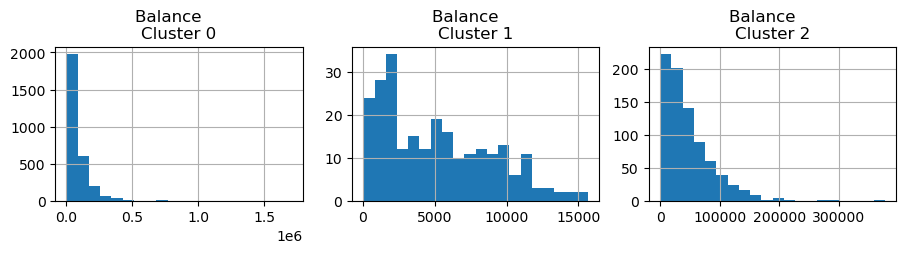

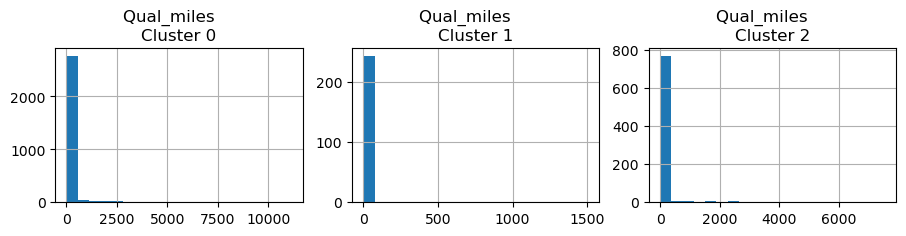

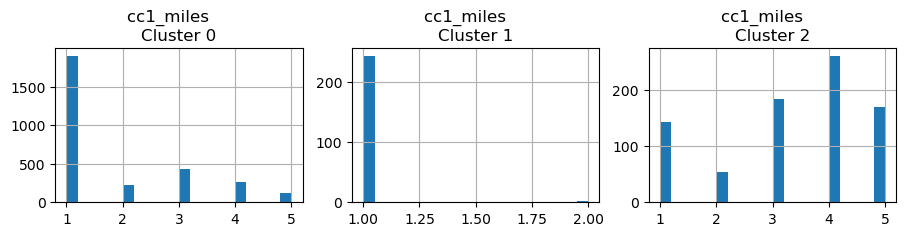

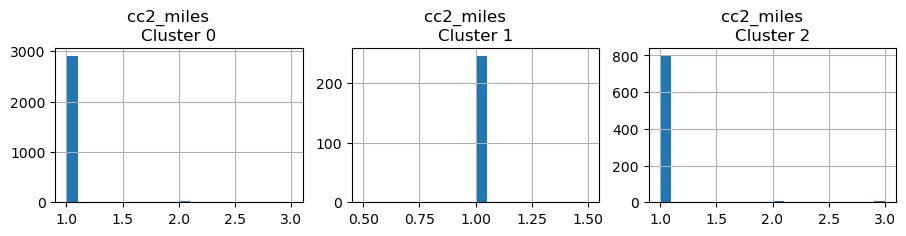

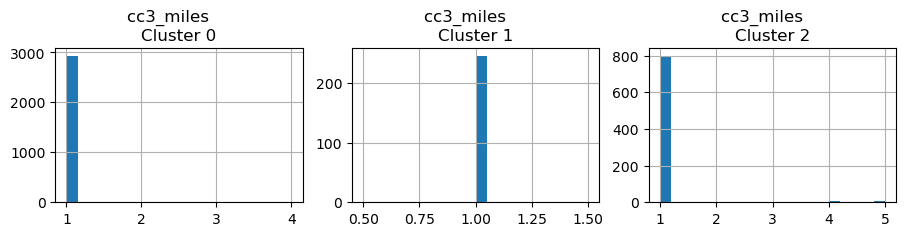

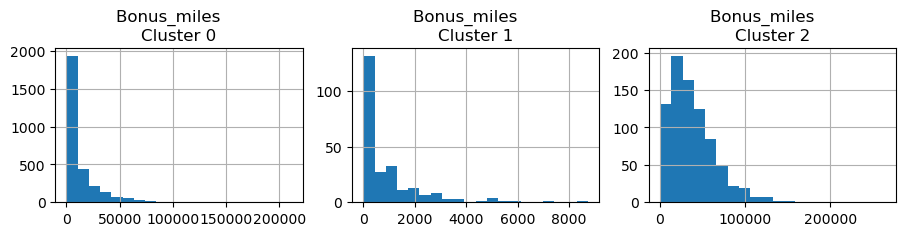

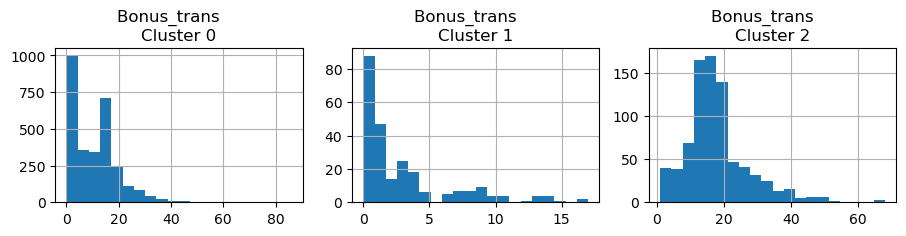

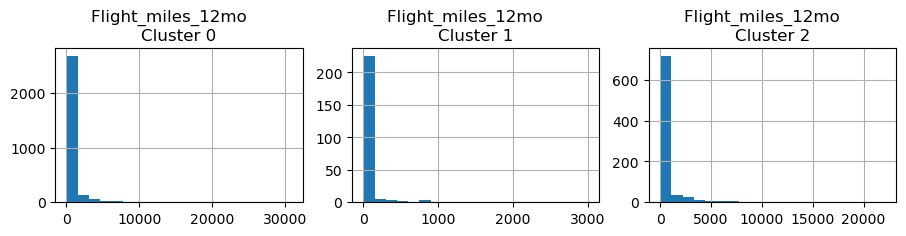

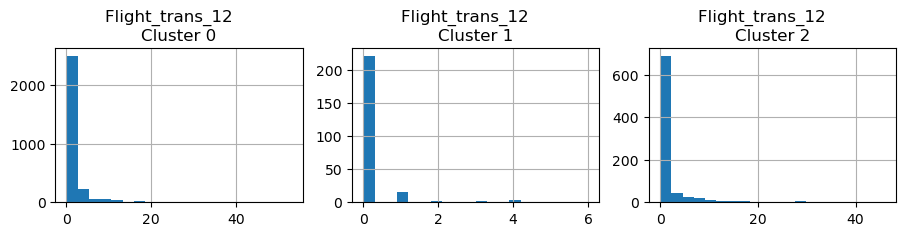

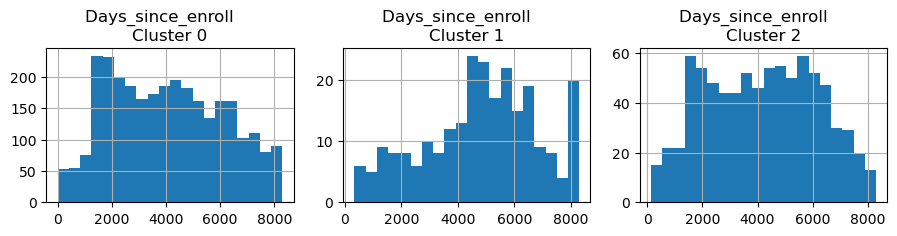

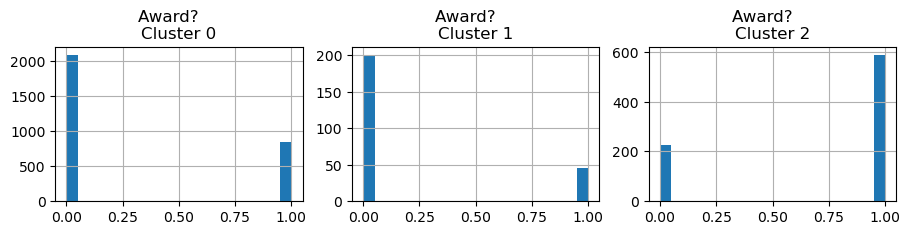

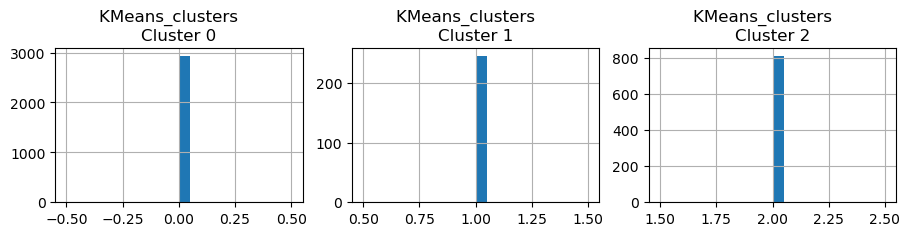

In [548]:
#Lets plot the histograms of all clusters with respect to all variables
for i in data2.columns:
    plt.figure(figsize=(30,2))
    for j in range(3):
        plt.subplot(1,8,j+1)
        cluster=data2[data2['KMeans_clusters']==j]
        cluster[i].hist(bins=20)
        plt.title('{}    \nCluster {}'.format(i,j))
        
plt.show()

In [549]:
k_centroid

,Cluster 1,Cluster 2,Cluster 3
Balance,86696.132743,5131.617886,47062.690798
Qual_miles,164.510551,8.150407,111.628221
cc1_miles,1.798162,1.008130,3.319018
cc2_miles,1.011232,1.000000,1.030675
cc3_miles,1.001702,1.000000,1.053988
Bonus_miles,12337.173928,869.394309,39388.652761
Bonus_trans,10.582029,2.930894,17.895706
Flight_miles_12mo,469.027570,66.808943,546.411043
Flight_trans_12,1.394826,0.195122,1.652761
Days_since_enroll,4045.548332,4824.329268,4168.727607


In [550]:
passenger_1.shape, passenger_2.shape, passenger_3.shape

((2938, 12), (246, 12), (815, 12))

In [551]:
2938/3999

0.7346836709177295

### Meaningful Cluster Labels from KMeans:
1.	Cluster1 = "Loyal Fliers" = There are 246 such passengers. They have the highest Number of days since Enroll_date but are not so frequent fliers. However, in proportion to their travel frequency, they do have a good usage of the card for Bonus_miles (Number of miles earned from non-flight bonus transactions in the past 12 months) and Awards.
This is quite similar to Cluster 3 of HCA.
2.	Cluster2 = "High Worth Regular Fliers" = There are 2398 such passengers. They are the regular passengers who spend and travel average to the other clusters. Their frequency of travel is also not proportional to the non-flight bonus transactions (in the past 12 months) or Award. They have the highest Balance and least Award, which indicates that they are not making use of the card satisfactorily.
This is similar to Cluster 2 of HCA, but a difference can be seen that they have the highest Number of miles counted as qualifying for Topflight status, which shows a higher worth of these customers.
3.	Cluster3 = "High Frequency Fliers"= There are 815 such passengers, with the highest cc1_miles (Number of miles earned with freq. flyer credit card in the past 12 months). These customers travel frequently and have the maximum flight miles in the past 12 months and highest number of flight transactions in the past 12 months. They also have the highest number of non-flight bonus transactions in the past 12 months. They have the highest award, which indicates that they have earned the most out of the card.
This is quite similar to Cluster 1 of HCA.

Conclusion: We can see that the clusters formed in Part (e)- KMeans is fairly similar to clusters formed in Part (c)- HCA, albeit with changes especially in the size.